# Bike-Sharing Demand Analysis

## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1.Load the data

In [2]:
data = pd.read_csv("hour.csv")

In [3]:
data.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [4]:
data.rename(columns = {"dteday":"date","mnth":"month"}, inplace = True )

## 2. Check for null values in the data and drop records with NAs.

In [5]:
data.isna().sum()

instant       0
date          0
season        0
yr            0
month         0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null records.

## 3.Sanity checks:

### 3.1 Check if registered + casual = cnt for all the records. If not, the row is  junk and should be dropped.

In [6]:
np.sum((data.casual + data.registered) != data.cnt)

0

In [7]:
#OR

In [8]:
data[(data.casual + data.registered) != data.cnt]

,instant,date,season,yr,month,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


### 3.2 Month values should be 1-12 only

In [9]:
np.unique(data.month)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [10]:
#OR

In [11]:
data[data.month>12]

,instant,date,season,yr,month,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


### 3.3 Hour values should be 0-23 

In [12]:
np.unique(data.hr)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [13]:
#OR

In [14]:
data[data.hr > 23]

,instant,date,season,yr,month,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


## 4.The variables ‘casual’ and ‘registered’ are redundant and need to be dropped. ‘Instant’ is the index and needs to be dropped too. The date column dteday will not be used in the model building, and therefore needs to be dropped. Create a new dataframe named inp1.

In [15]:
inp1 = data.drop(["casual","registered","instant","date"],axis =1)

In [16]:
inp1.head(2)

,season,yr,month,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40


## 5. Univariate analysis: 

### 5.1 Describe the numerical fields in the dataset using pandas describe method.

In [17]:
inp1.describe()

,season,yr,month,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


### 5.2 Make density plot for temp. This would give a sense of the centrality and the spread of the distribution.

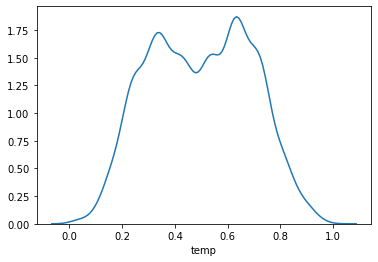

In [18]:
sns.distplot(inp1.temp, hist = False)
plt.show()

In [19]:
##OR

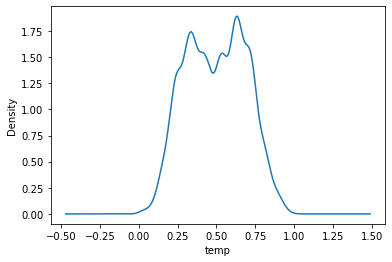

In [20]:
inp1.temp.plot.density()
plt.xlabel("temp")
plt.show()

### 5.3 Boxplot for atemp .Are there any outliers?

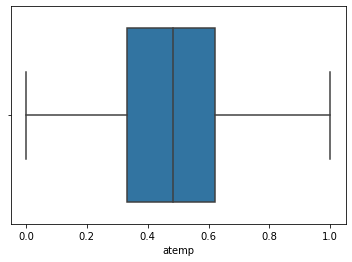

In [21]:
sns.boxplot(x= inp1.atemp)
plt.show()

There are no outliers present in atemp.

### 5.4 Histogram for hum.Do you detect any abnormally high values? 

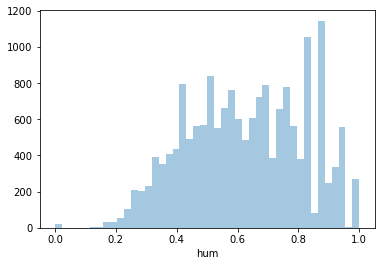

In [22]:
sns.distplot(inp1.hum, kde = False)
plt.show()

In [23]:
##OR

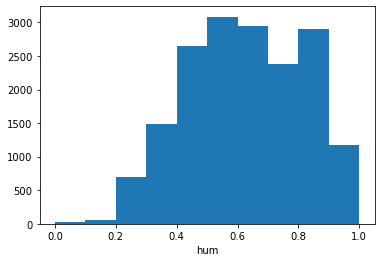

In [24]:
plt.hist(inp1.hum)
plt.xlabel("hum")
plt.show()

There are no visible abnormally high values.

### 5.5 Density plot for windspeed

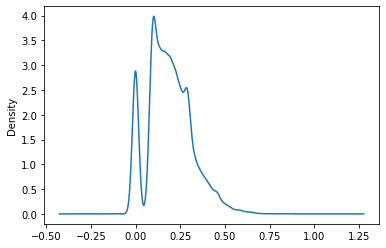

In [25]:
inp1.windspeed.plot.density()
plt.show()

In [26]:
##OR

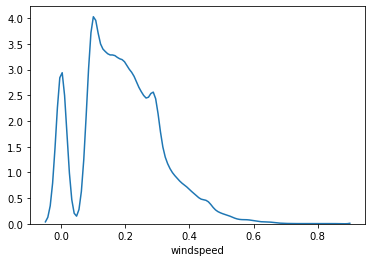

In [27]:
sns.distplot(inp1.windspeed, hist = False)
plt.show()

### 5.6 Box and density plot for cnt – this is the variable of interest .Do you see any outliers in the boxplot? Does the density plot provide a similar insight? 

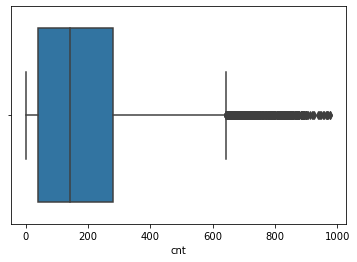

In [28]:
sns.boxplot(x=inp1.cnt)
plt.show()

There are outliers present in cnt.

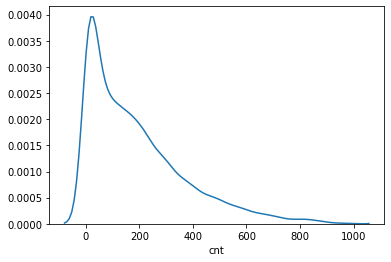

In [29]:
sns.distplot(inp1.cnt, hist = False)
plt.show()

Both Boxplot and Density plot shows the similar picture - there are high values in count

## 6. Outlier treatment:  

### 6.1 Cnt looks like some hours have rather high values. You’ll need to treat these outliers so that they don’t skew the analysis and the model. 
6.1.1Find out the following percentiles: 10, 25, 50, 75, 90, 95, 99

6.1.2Decide the cutoff percentile and drop records with values higher than the cutoff. Name the new dataframe as inp2. 

In [30]:
inp1.cnt.quantile([0.10,0.25,0.50,0.75,0.90,0.95,0.99])

0.10      9.00
0.25     40.00
0.50    142.00
0.75    281.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: cnt, dtype: float64

Taking 95 as cutoff percentile, we will drop the values higher than this

In [31]:
inp2= inp1.copy()

In [32]:
inp2 = inp2[inp2.cnt<563]

## 7. Bivariate Analysis: 

### 7.1 Make boxplot for cnt vs. hour.What kind of pattern do you see? 

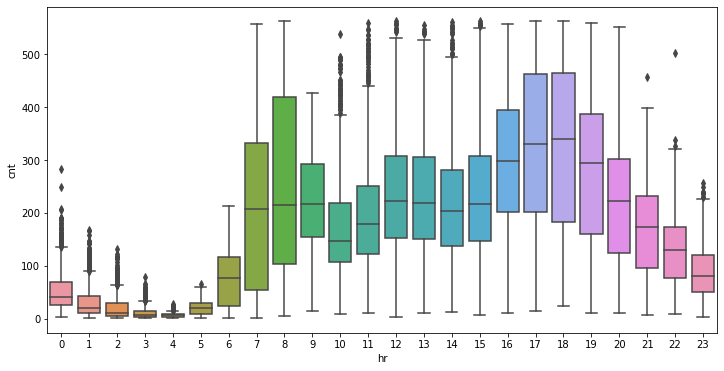

In [33]:
plt.figure(figsize = (12,6))
sns.boxplot(x="hr", y="cnt", data = inp2)
plt.show()

It can be said that during 7-8am demand of bike is high, and than later in the evening demand of bike again increases, mostly between 17-18.

### 7.2 Make boxplot for cnt vs. weekday.Is there any difference in the rides by days of the week? 

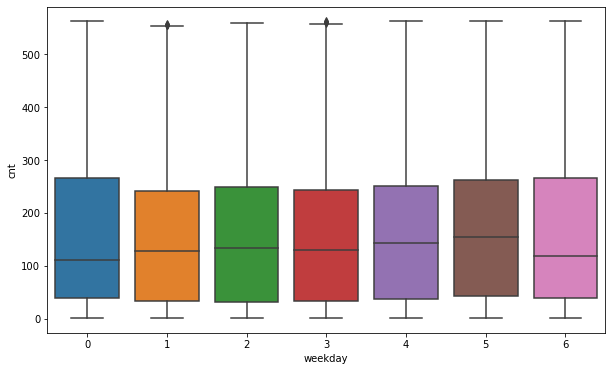

In [34]:
plt.figure(figsize = (10,6))
sns.boxplot(x="weekday", y="cnt", data = inp2)
plt.show()

There is not much difference in the rides by day of the weeks

### 7.3  Make boxplot for cnt vs. month.Look at the median values. Any month(s) that stand out?

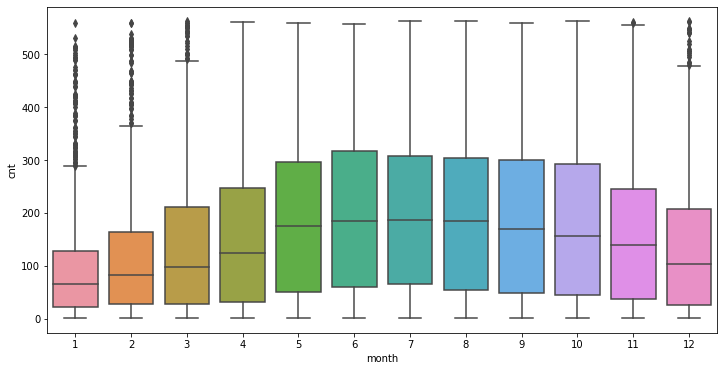

In [35]:
plt.figure(figsize = (12,6))
sns.boxplot(x="month", y="cnt", data = inp2)
plt.show()

In [36]:
inp2.groupby("month").describe()["cnt"]

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,1429.0,94.424773,99.907146,1.0,21.00,66.0,128.0,559.0
2,1339.0,112.147872,111.025249,1.0,28.00,82.0,163.5,560.0
3,1412.0,133.305949,125.784331,1.0,27.00,98.0,211.0,562.0
4,1349.0,156.874722,140.016547,1.0,32.00,123.0,246.0,561.0
5,1399.0,194.346676,152.900724,1.0,50.00,175.0,295.5,559.0
6,1324.0,203.248489,154.404161,1.0,58.75,185.0,317.0,558.0
7,1401.0,202.911492,149.787752,1.0,65.00,186.0,308.0,562.0
8,1365.0,200.175092,152.413793,1.0,53.00,185.0,303.0,562.0
9,1296.0,189.577932,151.383678,1.0,47.75,170.0,299.0,560.0


Median value for month 6 and 8 are 185 and for 7th month it is 186

### 7.4 Make boxplot for cnt vs. season.Which season has the highest rides in general? Expected? 

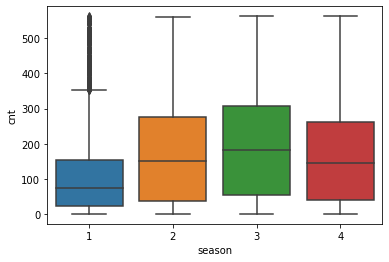

In [37]:
plt.figure(figsize = (6,4))
sns.boxplot(x="season", y="cnt", data = inp2)
plt.show()

In [38]:
inp2.groupby("season").describe()["cnt"]

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,4208.0,106.696293,108.864467,1.0,23.0,75.0,155.25,562.0
2,4122.0,176.440805,147.853084,1.0,39.0,150.0,276.00,561.0
3,4167.0,199.384689,151.453282,1.0,55.0,182.0,306.00,562.0
4,4005.0,171.000000,142.415480,1.0,41.0,145.0,262.00,562.0


fall season has highest ride

### 7.5 Make a bar plot with the median value of cnt for each hr.Does this paint a different picture from the box plot? 

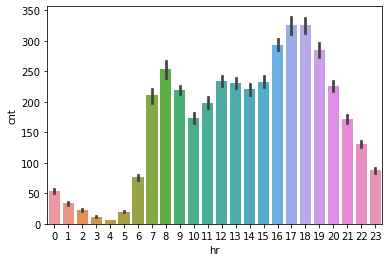

In [39]:
sns.barplot(x="hr",y="cnt",data= inp2)
plt.show()

### 7.6 Make a correlation matrix for variables atemp, temp, hum, and windspeed. Which variables have the highest correlation? 

In [40]:
variables = inp2.loc[:,["atemp","temp","hum","windspeed"]]

In [41]:
variables.corr()

,atemp,temp,hum,windspeed
atemp,1.000000,0.988218,-0.025747,-0.073985
temp,0.988218,1.000000,-0.042603,-0.033209
hum,-0.025747,-0.042603,1.000000,-0.288648
windspeed,-0.073985,-0.033209,-0.288648,1.000000


atemp and temp are highly correlated

## 8. Data preprocessing

A few key considerations for the preprocessing: 

There are plenty of categorical features. Since these categorical features can’t be used in the predictive model, you need to convert to a suitable numerical representation. Instead of creating dozens of new dummy variables, try to club levels of categorical features wherever possible. For a feature with high number of categorical levels, you can club the values that are very similar in value for the target variable. 

### 8.1 Treating mnth column--For values 5,6,7,8,9,10, replace with a single value 5. This is because these have very similar values for cnt.Get dummies for the updated 6 mnth values



In [42]:
new_data = inp2.copy()

In [43]:
new_data.month = new_data.month.replace([6,7,8,9,10],5)

In [44]:
new_data.month.unique()

array([ 1,  2,  3,  4,  5, 11, 12], dtype=int64)

### 8.2 Treating hr column--Create new mapping: 0-5: 0, 11-15: 11; other values are untouched. Again, the bucketing is done in a way that hr values with similar levels of cnt are treated the same.

 

In [45]:
new_data.hr = new_data.hr.replace([0,1,2,3,4,5],0)
new_data.hr = new_data.hr.replace([11,12,13,14,15],11)

In [46]:
new_data.hr.unique()

array([ 0,  6,  7,  8,  9, 10, 11, 16, 17, 18, 19, 20, 21, 22, 23],
      dtype=int64)

### 8.3 Get dummy columns for season, weathersit, weekday, mnth, and hr. You needn’t club these further as the levels seem to have different values for the median cnt, when seen from the box plots. 

In [51]:
new_data = pd.get_dummies(new_data, columns =["season","weathersit","weekday","month","hr"], drop_first=True)

In [55]:
new_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'weathersit_2',
       'weathersit_3', 'weathersit_4', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_11', 'month_12', 'hr_6', 'hr_7', 'hr_8', 'hr_9',
       'hr_10', 'hr_11', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21',
       'hr_22', 'hr_23'],
      dtype='object')

## 9. Train test split: Apply 70-30 split -- call the new dataframes df_train and df_test 

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
df_train, df_test = train_test_split(new_data, test_size = 0.30, random_state = 40)

## 10. Separate X and Y for df_train and df_test. For example, you should have X_train, y_train from df_train. y_train should be the cnt column from inp3 and X_train should be all other columns.

In [58]:
y_train = df_train.pop("cnt")
X_train = df_train

In [59]:
y_test = df_test.pop("cnt")
X_test = df_test

## 11 . Model building: Use linear regression as the technique. Report the R2 on the train set 

In [61]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X_train, y_train)
model

LinearRegression()

In [64]:
from sklearn.metrics import r2_score
y_train_predict = lr.predict(X_train)
r2_score(y_train, y_train_predict)

0.6686885414242423

## 12. Make predictions on test set and report R2. 

In [65]:
y_test_predict = lr.predict(X_test)
r2_score(y_test, y_test_predict)

0.6680629264143584